In [1]:
import numpy as np
from qulacs import QuantumState
from qulacs.gate import X

n = 3
state = QuantumState(n)
# x_gate = X(0)
# x_gate.update_quantum_state(state)
state.set_Haar_random_state()
data = state.sampling(1)

# 二進数表示
# index 0のqubitは一番右に表示される
value = format(data[0], "b").zfill(n)
print(f"The result of a sampling measurement is  {data[0]} when displayed in decimal.")
print(f"The result of a sampling measurement is {value} when displayed in binary.")
print(f"The first two qubits are {value[-2:]}.")

The result of a sampling measurement is  6 when displayed in decimal.
The result of a sampling measurement is 110 when displayed in binary.
The first two qubits are 10.


In [21]:
# measurement gateの確認
#: When we add a measurement gate for a qubit, this qubit is determined a specific state 0 or 1.
#: If it is possible to implement swap gate, we can repeate measurement and swap gate alternately.

from qulacs.gate import Measurement
from qulacs import QuantumCircuit

n = 2
state = QuantumState(n)
state.set_Haar_random_state()
print(state)

circuit = QuantumCircuit(n)
circuit.add_H_gate(0)
circuit.add_gate(Measurement(0, 0))
circuit.update_quantum_state(state)

print(state)
print(state.get_classical_value(0))

 *** Quantum State ***
 * Qubit Count : 2
 * Dimension   : 4
 * State vector : 
(-0.341238,0.174226)
(-0.140249,0.293354)
(0.471066,0.0656875)
 (0.405062,0.597647)

 *** Quantum State ***
 * Qubit Count : 2
 * Dimension   : 4
 * State vector : 
(-0.373923,0.363123)
               (0,0)
 (0.680402,0.515147)
               (0,0)

0


CAUTION: The 0-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 1-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 6-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 7-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 16-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 17-th Gate you added is skipped.                    This gate does not have "target_qubit_list".


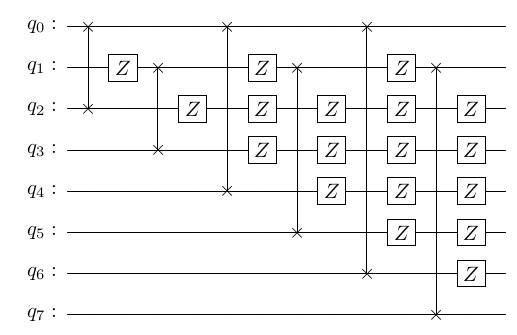

In [1]:
# swap gateの実装
# exp(-i * pi * h_{1, 2n}) = (|00><00| + |11><11|) \tensor I + (|00><00| + |11><11|) \tensor Z

from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import Measurement
from qulacsvis import circuit_drawer

def add_swap_gate(circuit, control_qubit, target_qubit):
    circuit.add_SWAP_gate(control_qubit, target_qubit)
    for i in range(control_qubit + 1, target_qubit):
        circuit.add_Z_gate(i)

    return None

n = 8
state = QuantumState(n)
circuit = QuantumCircuit(n)
circuit.add_gate(Measurement(0, 0))
circuit.add_gate(Measurement(1, 1))
add_swap_gate(circuit, 0, 2)
add_swap_gate(circuit, 1, 3)
circuit.add_gate(Measurement(0, 0))
circuit.add_gate(Measurement(1, 1))
add_swap_gate(circuit, 0, 4)
add_swap_gate(circuit, 1, 5)
circuit.add_gate(Measurement(0, 0))
circuit.add_gate(Measurement(1, 1))
add_swap_gate(circuit, 0, 6)
add_swap_gate(circuit, 1, 7)
circuit_drawer(circuit, 'latex')

In [3]:
from IPython.display import Image, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE
init_printing() # ベクトルや行列を綺麗に表示するため

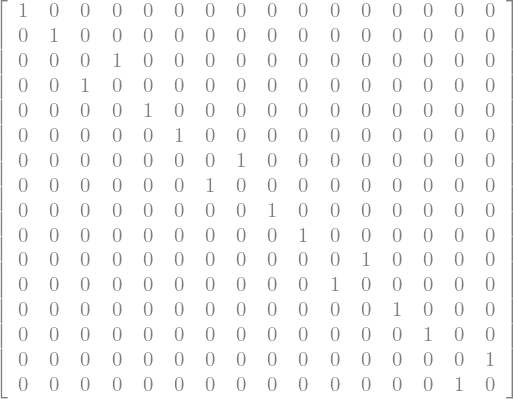

In [6]:
represent(CNOT(1,0),nqubits=4)

CAUTION: The 0-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 1-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 6-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 7-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 16-th Gate you added is skipped.                    This gate does not have "target_qubit_list".
CAUTION: The 17-th Gate you added is skipped.                    This gate does not have "target_qubit_list".


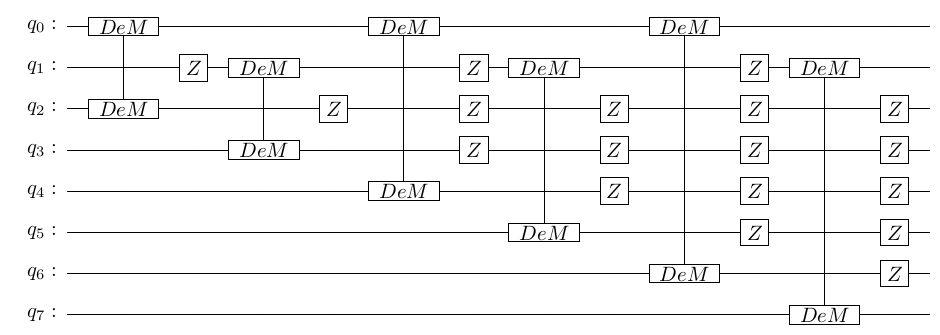

In [7]:
from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import Measurement, DenseMatrix
from qulacsvis import circuit_drawer

def add_swap_gate_for_xy_model(circuit: QuantumCircuit, control_qubit_num: int, target_qubit_num: int):
    swap = DenseMatrix([control_qubit_num,target_qubit_num], [[0,0,0,0],[0,0,1,0],[0,-1,0,0],[0,0,0,0]])
    circuit.add_gate(swap)
    for i in range(control_qubit_num + 1, target_qubit_num):
        circuit.add_Z_gate(i)

    return None

n = 8
state = QuantumState(n)
circuit = QuantumCircuit(n)
circuit.add_gate(Measurement(0, 0))
circuit.add_gate(Measurement(1, 1))
add_swap_gate_for_xy_model(circuit, 0, 2)
add_swap_gate_for_xy_model(circuit, 1, 3)
circuit.add_gate(Measurement(0, 0))
circuit.add_gate(Measurement(1, 1))
add_swap_gate_for_xy_model(circuit, 0, 4)
add_swap_gate_for_xy_model(circuit, 1, 5)
circuit.add_gate(Measurement(0, 0))
circuit.add_gate(Measurement(1, 1))
add_swap_gate_for_xy_model(circuit, 0, 6)
add_swap_gate_for_xy_model(circuit, 1, 7)
circuit_drawer(circuit, 'latex')